# Visualisation des features

In [2]:
from tools.data import DreemDatasets
from preprocessing.features import ExtractFeatures
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

In [3]:
use_datasets = ['eeg_1', 'eeg_2', 'eeg_3', 'eeg_4', 'eeg_5', 'eeg_6', 'eeg_7']
features = ['min', 'max', 'energy', 'mmd', 'esis', 'frequency']

## Créer features

Sauter à la prochaine section si déjà créées.

On définit les transformations pour les différents eeg. On choisit d'extraire toutes les bandes de fréquence (d'où la wildcard `'*'`).

In [4]:
dataset_transforms = {
    "eeg_1": ExtractFeatures(features, bands='*'),
    "eeg_2": ExtractFeatures(features, bands='*'),
    "eeg_3": ExtractFeatures(features, bands='*'),
    "eeg_4": ExtractFeatures(features, bands='*'),
    "eeg_5": ExtractFeatures(features, bands='*'),
    "eeg_6": ExtractFeatures(features, bands='*')
}

Récupère tout les datasets et load en mémoire.

In [6]:
train_set, val_set = DreemDatasets('dataset/train.h5', 'dataset/train_y.csv', 
                                   keep_datasets=use_datasets, split_train_val=0.8, seed=0,
                                   size=5000, transforms=dataset_transforms).get()

train_set.load_data("dataset/all_eegs/train")  # Charge en mémoire. Peut-être un peu long

train_set.close()  # On ferme les fichiers h5
val_set.close()

Loading data in memory...
5412 in 7 datasets to load
Loading dataset eeg_1 ...
Loading dataset eeg_2 ...
Loading dataset eeg_3 ...
Loading dataset eeg_4 ...
Loading dataset eeg_5 ...
Loading dataset eeg_6 ...
Loading dataset eeg_7 ...
Done.


In [69]:
X, _, y = train_set[:]

X = X.transpose(1, 0, 2)

print(X.shape)

(5412, 7, 1500)


In [5]:
def get_window(X, window):
    start = 0
    for i in range(len(X)):
        if X[i] > 700 or X[i] < -700:
            start = i+20
        elif i-start == window:
            break
    return start

In [117]:
X_by_target = [X[y == 0], X[y == 1], X[y == 2], X[y == 3], X[y == 4]]  # Separate X by classes

In [6]:
labels = ["awake", "light sleep 1", "light sleep 2", "deep sleep", "REM"]

In [119]:
def show_card(k):
    fig, axes = plt.subplots(5, 7, figsize=(16, 10))

    for i in range(5):
        for j in range(7):
            start = get_window(X_by_target[i][k, j], window=500)
            axes[i][j].plot(X_by_target[i][k, j, start:start+500])
            axes[i][j].grid('off')
            axes[i][j].set_title("eeg " + str(j+1) + ", " + labels[i])

    plt.subplots_adjust(hspace=0.5)
    plt.show()

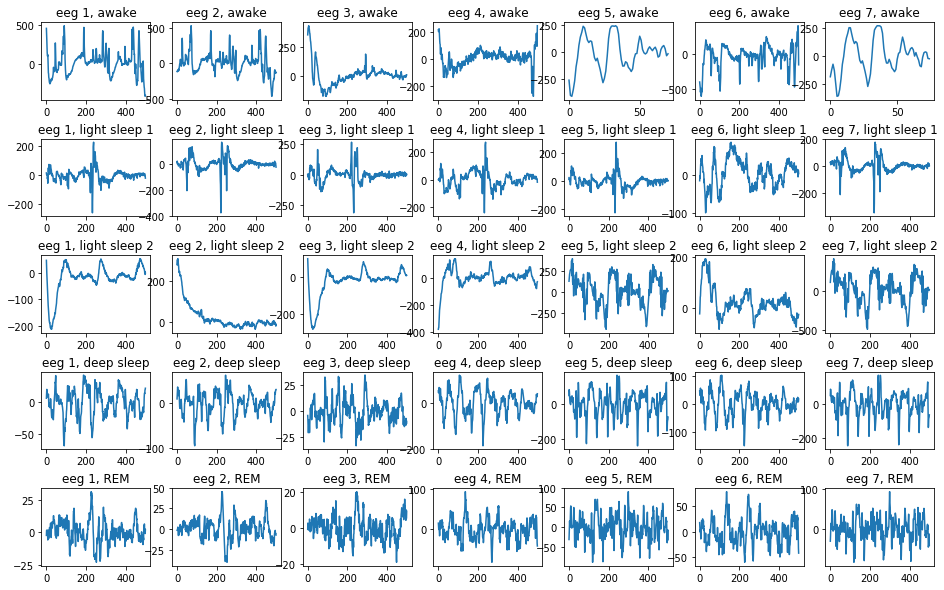

In [120]:
show_card(0)

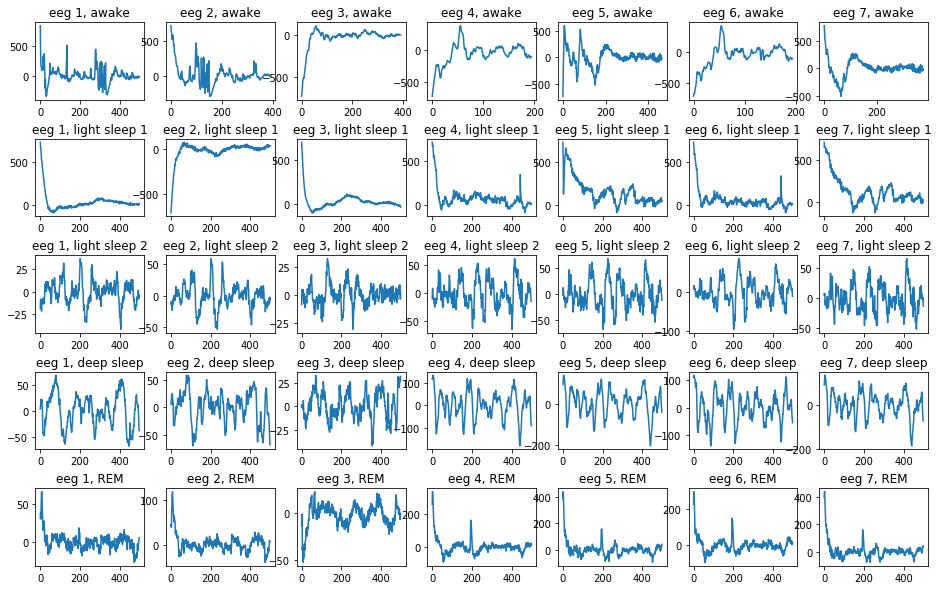

In [112]:
show_card(1)

In [7]:
train_set, val_set = DreemDatasets('dataset/train.h5', 'dataset/train_y.csv', 
                                   keep_datasets=use_datasets, split_train_val=0.8, seed=0,
                                   size=5000, transforms=dataset_transforms).get()

train_set.load_data("dataset/eegs_bands/train")  # Charge en mémoire. Peut-être un peu long

train_set.close()  # On ferme les fichiers h5
val_set.close()

Loading data in memory...
5412 in 7 datasets to load
Loading dataset eeg_1 ...
Loading dataset eeg_2 ...
Loading dataset eeg_3 ...
Loading dataset eeg_4 ...
Loading dataset eeg_5 ...
Loading dataset eeg_6 ...
Loading dataset eeg_7 ...
Done.


In [8]:
X, _, y = train_set[:]

X = X.transpose(1, 0, 2, 3)

print(X.shape)

(5412, 7, 4, 1500)


In [9]:
X_by_target = [X[y == 0], X[y == 1], X[y == 2], X[y == 3], X[y == 4]]  # Separate X by classes

In [10]:
label_bands = ['delta', 'theta', 'alpha', 'beta']

In [11]:
def show_card(k, l):
    fig, axes = plt.subplots(4, 7, figsize=(16, 10))

    for i in range(4):
        for j in range(7):
            #start = get_window(X_by_target[l][k, j, i], window=500)
            axes[i][j].plot(X_by_target[l][k, j, i])
            axes[i][j].grid('off')
            axes[i][j].set_title("eeg " + str(j+1) + ", " + label_bands[i] + ", " + labels[l])

    plt.subplots_adjust(hspace=0.5)
    plt.show()

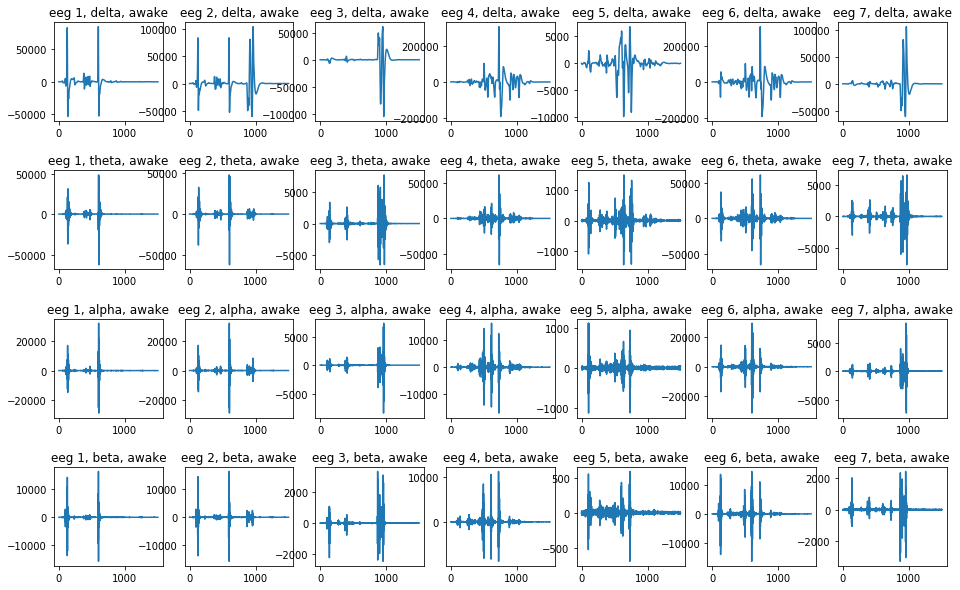

In [15]:
show_card(1, 0)

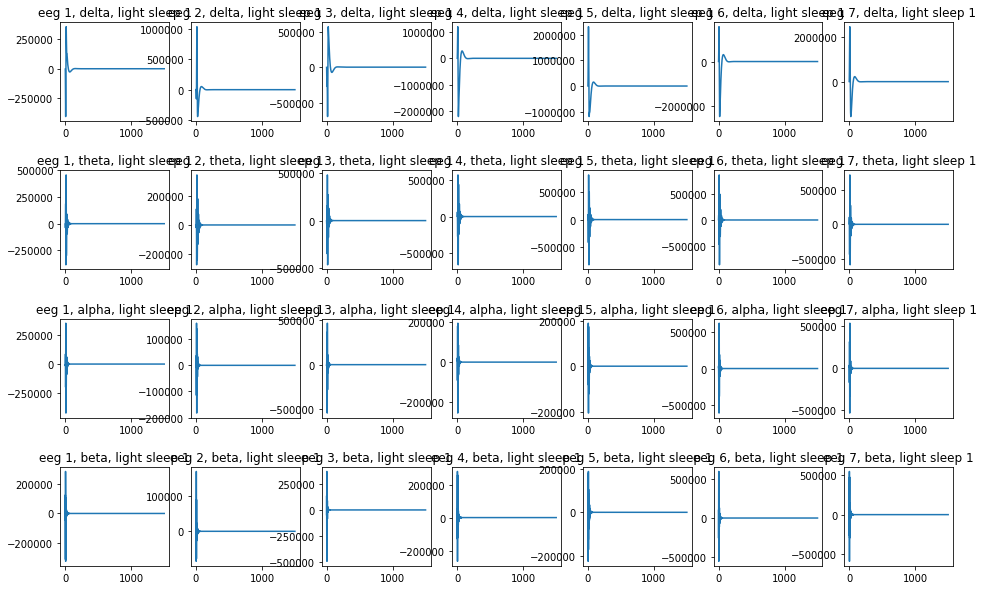

In [25]:
show_card(1, 1)

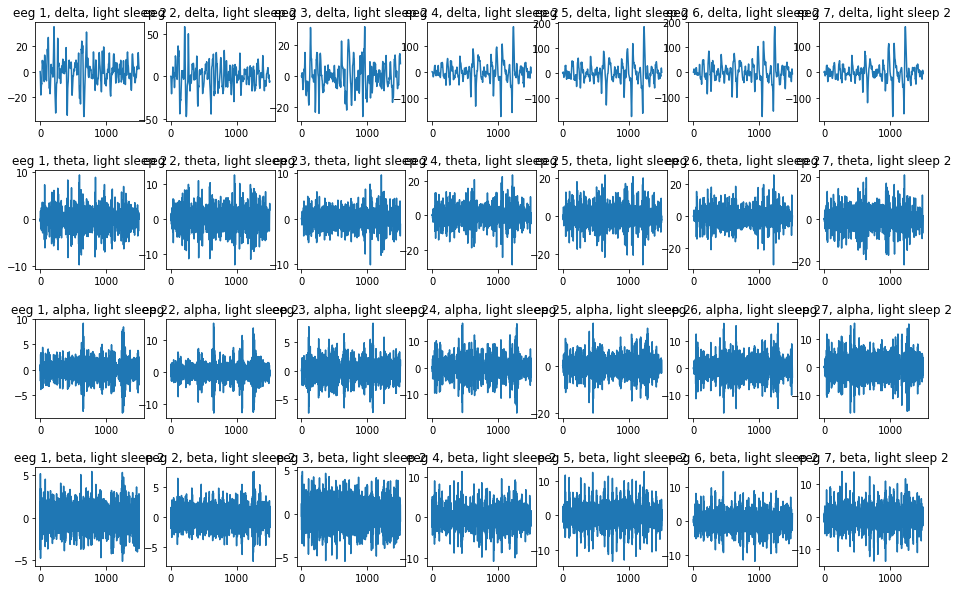

In [26]:
show_card(1, 2)

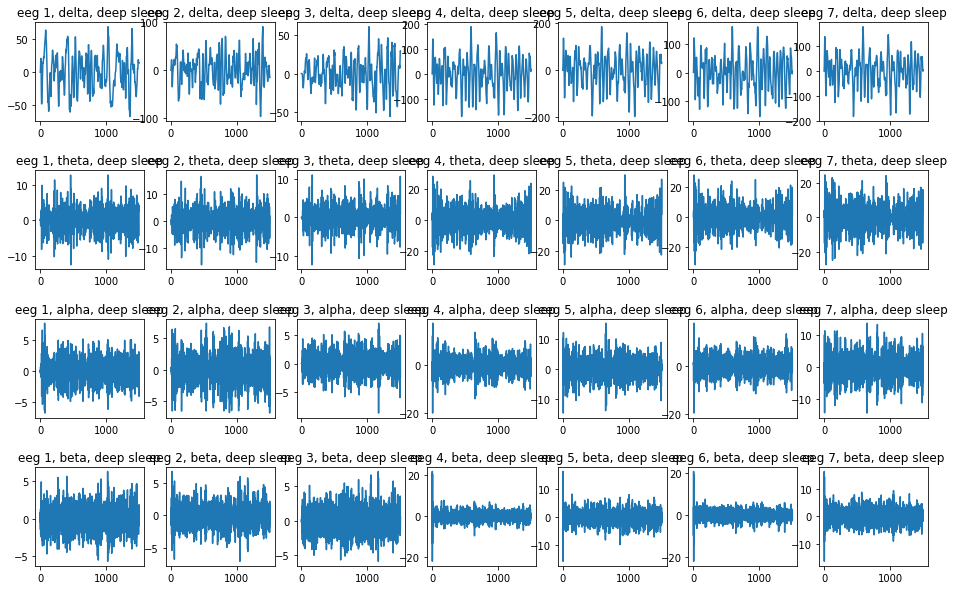

In [27]:
show_card(1, 3)

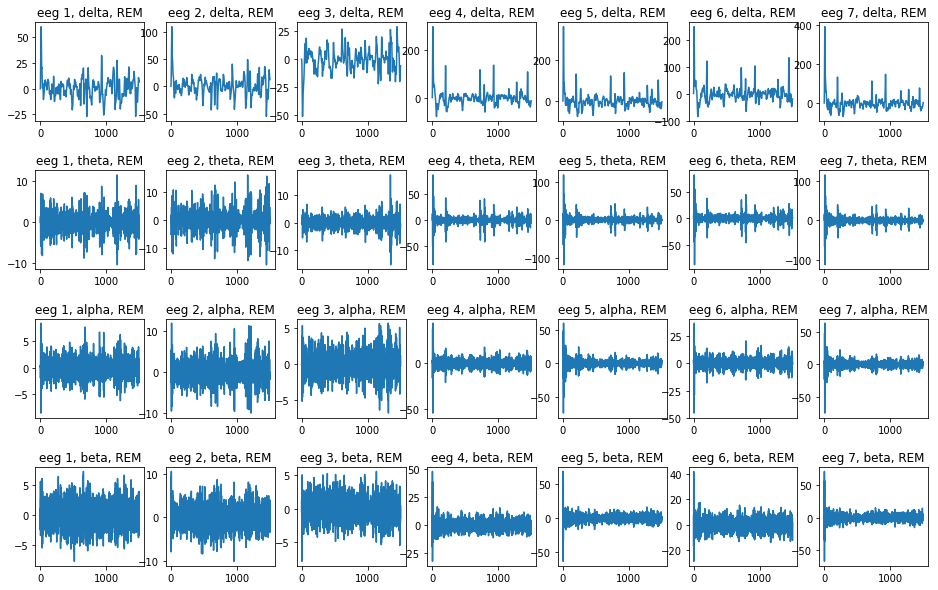

In [28]:
show_card(1, 4)